In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')

# from windwave.defs import Case, Interface2D
# from windwave.prepare import read_p, read_fields

%load_ext autoreload
%autoreload 3
    
from windwave.fio import read_fields_2D


In [40]:
path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU8/'
times = np.arange(45,53,0.1)
ds1 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU8_ensem2/'
times = np.arange(45,53,0.1)
ds2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU8_ensem3/'
times = np.arange(45,53,0.1)
ds3 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

ds = xr.concat([ds1, ds2, ds3], dim='ensem')
start_time = 45 
ds['y'] = ds['y'] - 1
ds['t'] = ds['t'] - start_time

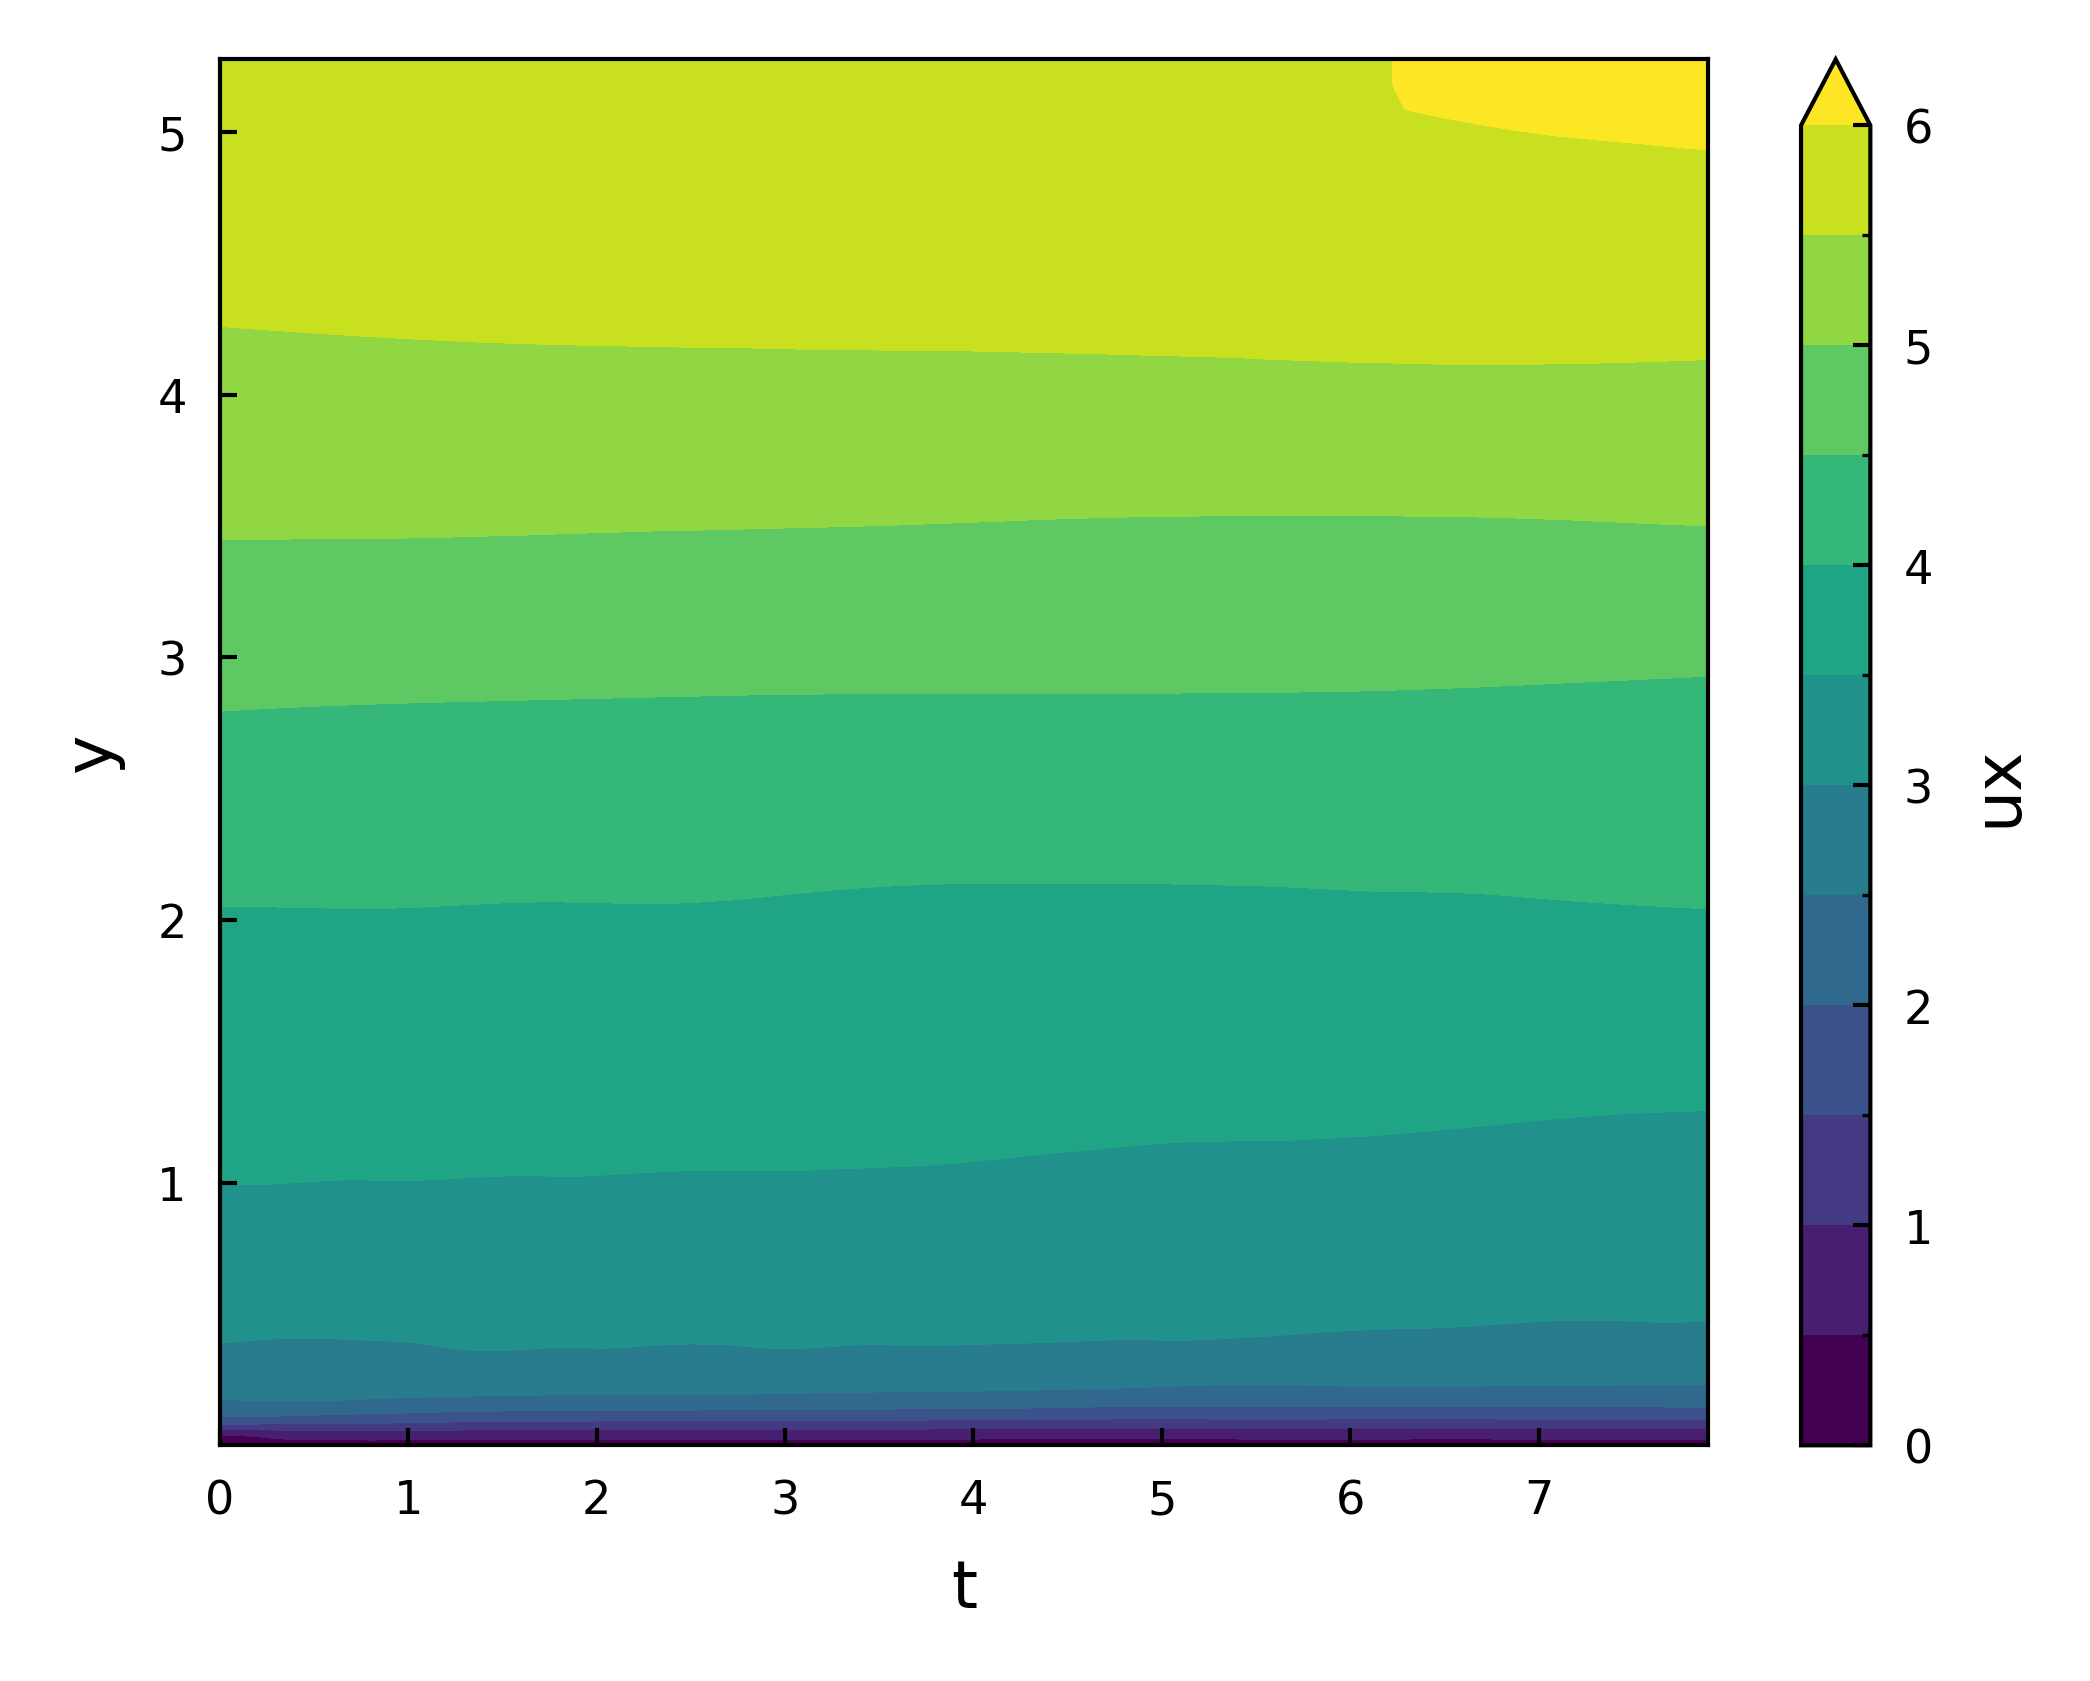

In [41]:
fig = plt.figure(figsize=[4,3])
ds.where(ds.y>0,drop=True).sel(ensem=2).ux.mean(dim='x').plot.contourf(x='t', vmin=0, vmax=6, levels=13)

In [35]:
path = '/home/ctrsp-2024/jiarongw/outputs/CU8/'
# times = np.arange(40,52,0.1)
times = np.arange(40,46.3,0.1)
ds1 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/CU8_ensem2/'
times = np.arange(40,46.3,0.1)
ds2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

# path = '/home/ctrsp-2024/jiarongw/outputs/CU8_ensem3/'
# times = np.arange(45,53,0.1)
# ds3 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

ds = xr.concat([ds1, ds2], dim='ensem')
start_time = 40
ds['y'] = ds['y'] - 1
ds['t'] = ds['t'] - start_time

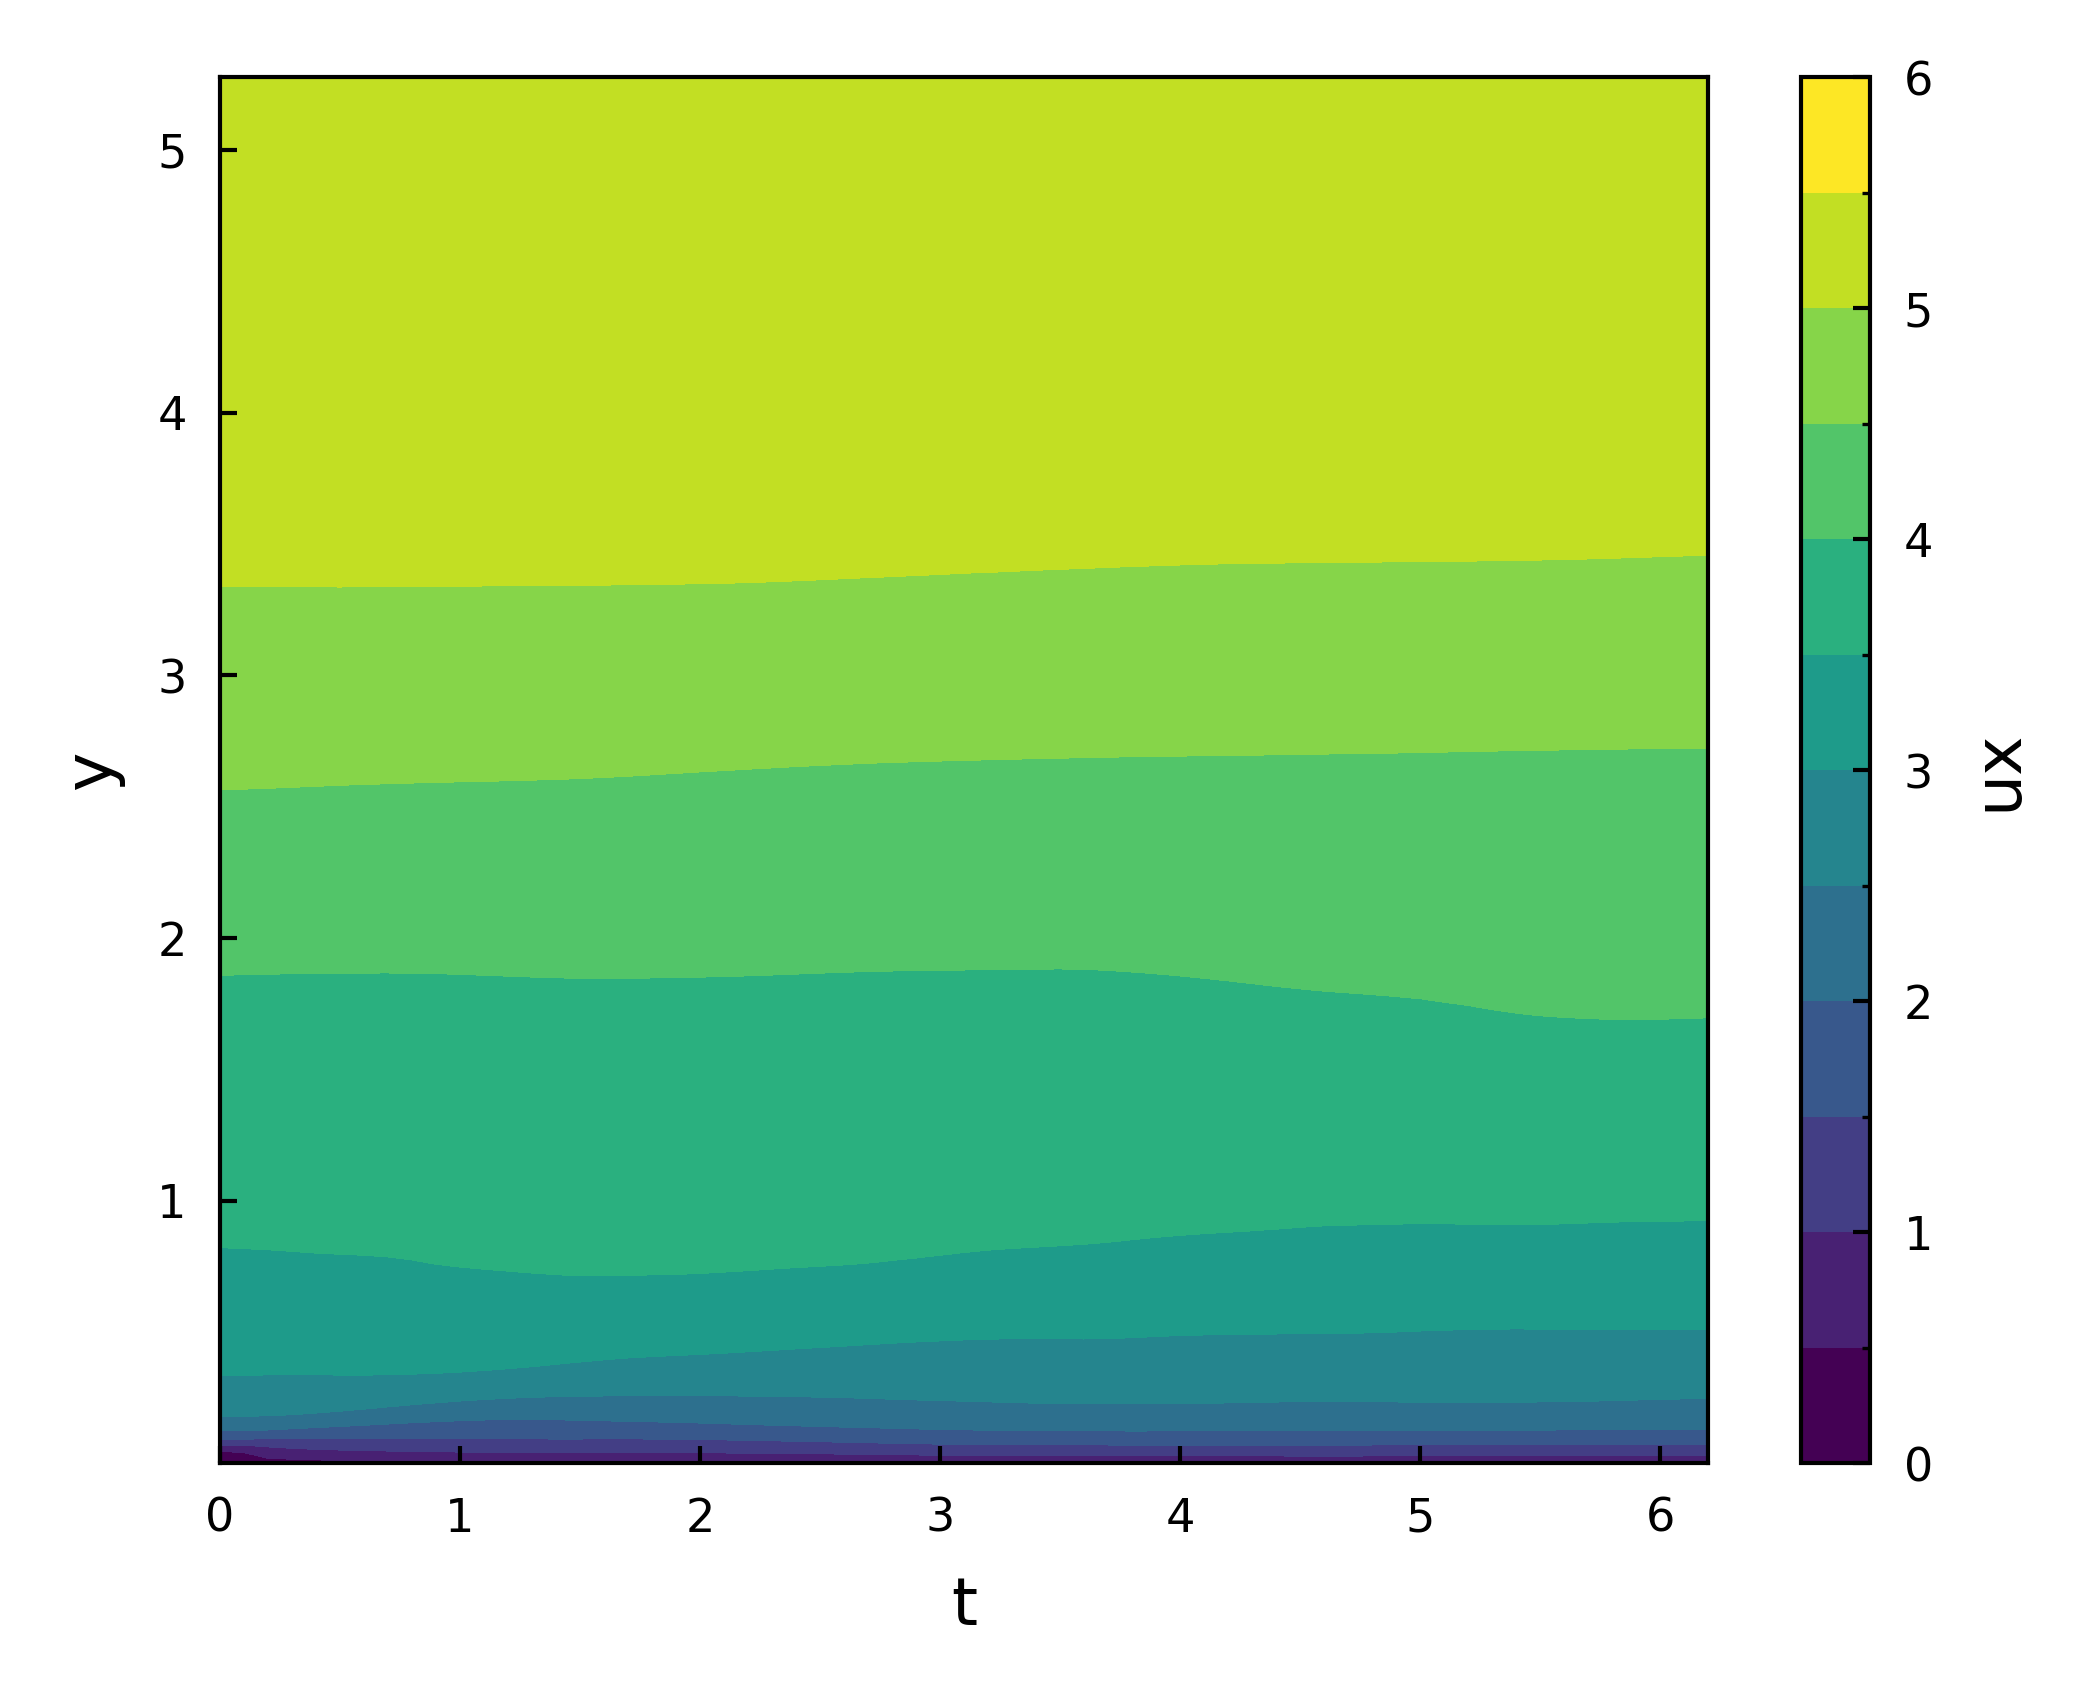

In [39]:
fig = plt.figure(figsize=[4,3])
ds.where(ds.y>0,drop=True).sel(ensem=1).ux.mean(dim='x').plot.contourf(x='t', vmin=0, vmax=6, levels=13)

In [92]:
path1 = '/home/ctrsp-2024/jiarongw/outputs/CU2/'
path2 = '/home/ctrsp-2024/jiarongw/outputs/CU4/'
path3 = '/home/ctrsp-2024/jiarongw/outputs/CU8/'

paths = [path1, path2, path3]
CUs = [2,4,8]
times = np.arange(40,50.1,0.1)
start_time = 40

dss = []
for i, path in enumerate(paths):
    ds = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])
    ds['y'] = ds['y'] - 1
    ds['t'] = ds['t'] - start_time
    dss.append(ds)

ds = xr.concat(dss, dim='CU')
ds['CU'] = np.array(CUs)

/tmp/ipykernel_154120/432805012.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(g.axes.flat):


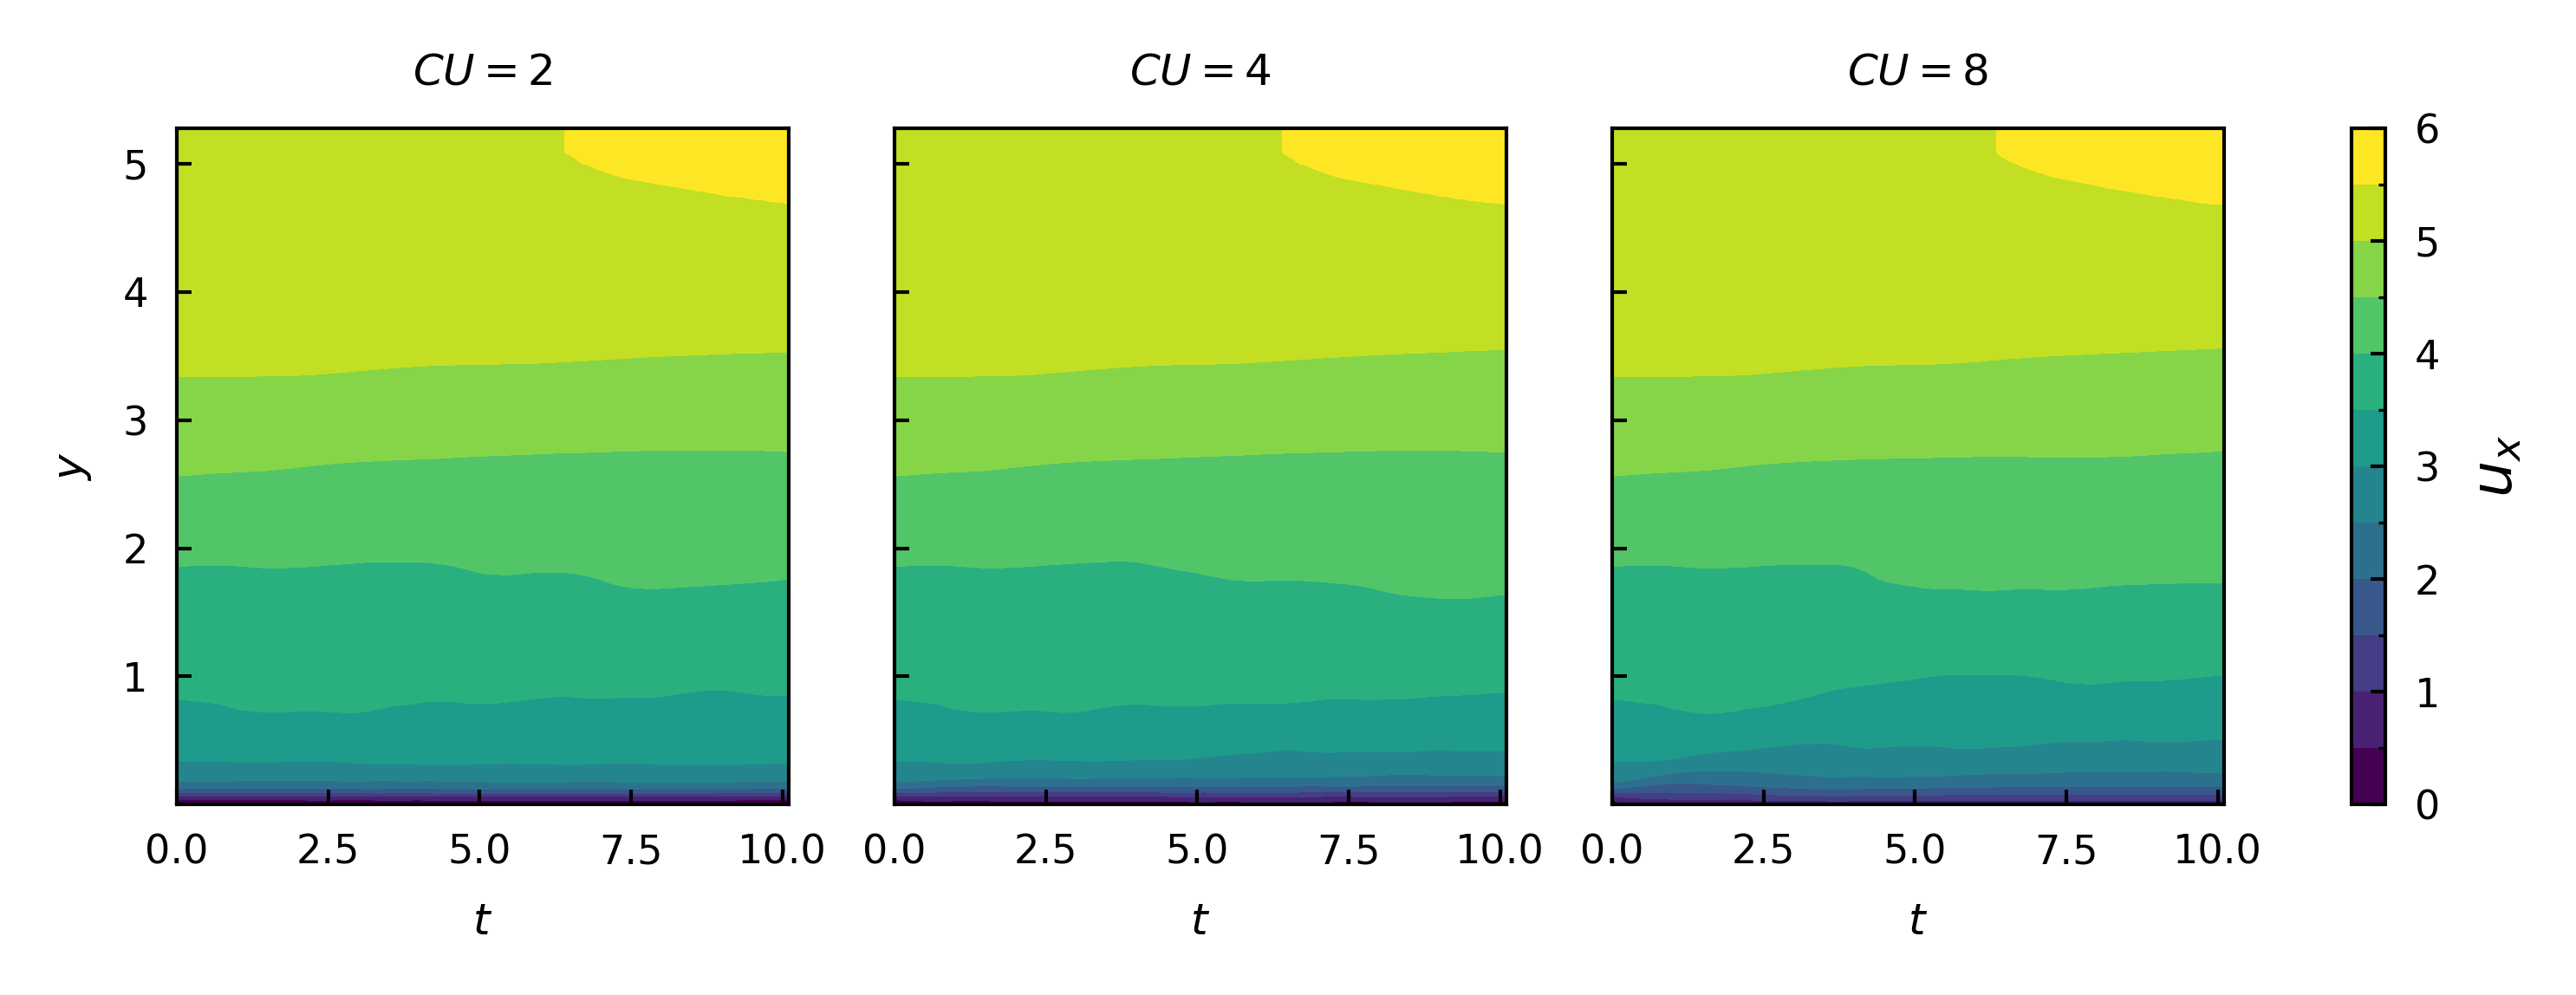

In [93]:
####### First way of creating panels of CU ##########
# fig, axes = plt.subplots(1, 3, sharey=True, figsize=[10,3])
# for i, ds in enumerate(dss):
#     a = ds.where(ds.y>0, drop=True).ux.mean(dim='x').plot.contourf(x='t', \
#     vmin=0, vmax=6, levels=13, ax=axes[i], add_colorbar=False)

# cbar = fig.colorbar(a)

########## Second way ##############
g = ds.ux.where(ds.y>0, drop=True).mean(dim='x').plot.contourf(col='CU', \
        x='t', col_wrap=3, vmin=0, vmax=6, levels=13, cbar_kwargs={'label':r'$u_x$'}, figsize=[5.5,2])
g.set_titles(template="$CU = {value}$", fontsize=6)
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel('$t$', fontsize=6)
    if i == 0:
        ax.set_ylabel('$y$', fontsize=6)

In [77]:
path1 = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU2/'
path2 = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU4/'
path3 = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU8/'

paths = [path1, path2, path3]
CUs = [2,4,8]
times = np.arange(45,58,0.1)
start_time = 45

dss = []
for i, path in enumerate(paths):
    ds = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])
    ds['y'] = ds['y'] - 1
    ds['t'] = ds['t'] - start_time
    dss.append(ds)

ds = xr.concat(dss, dim='CU')
ds['CU'] = np.array(CUs)

/tmp/ipykernel_154120/3928034758.py:4: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(g.axes.flat):


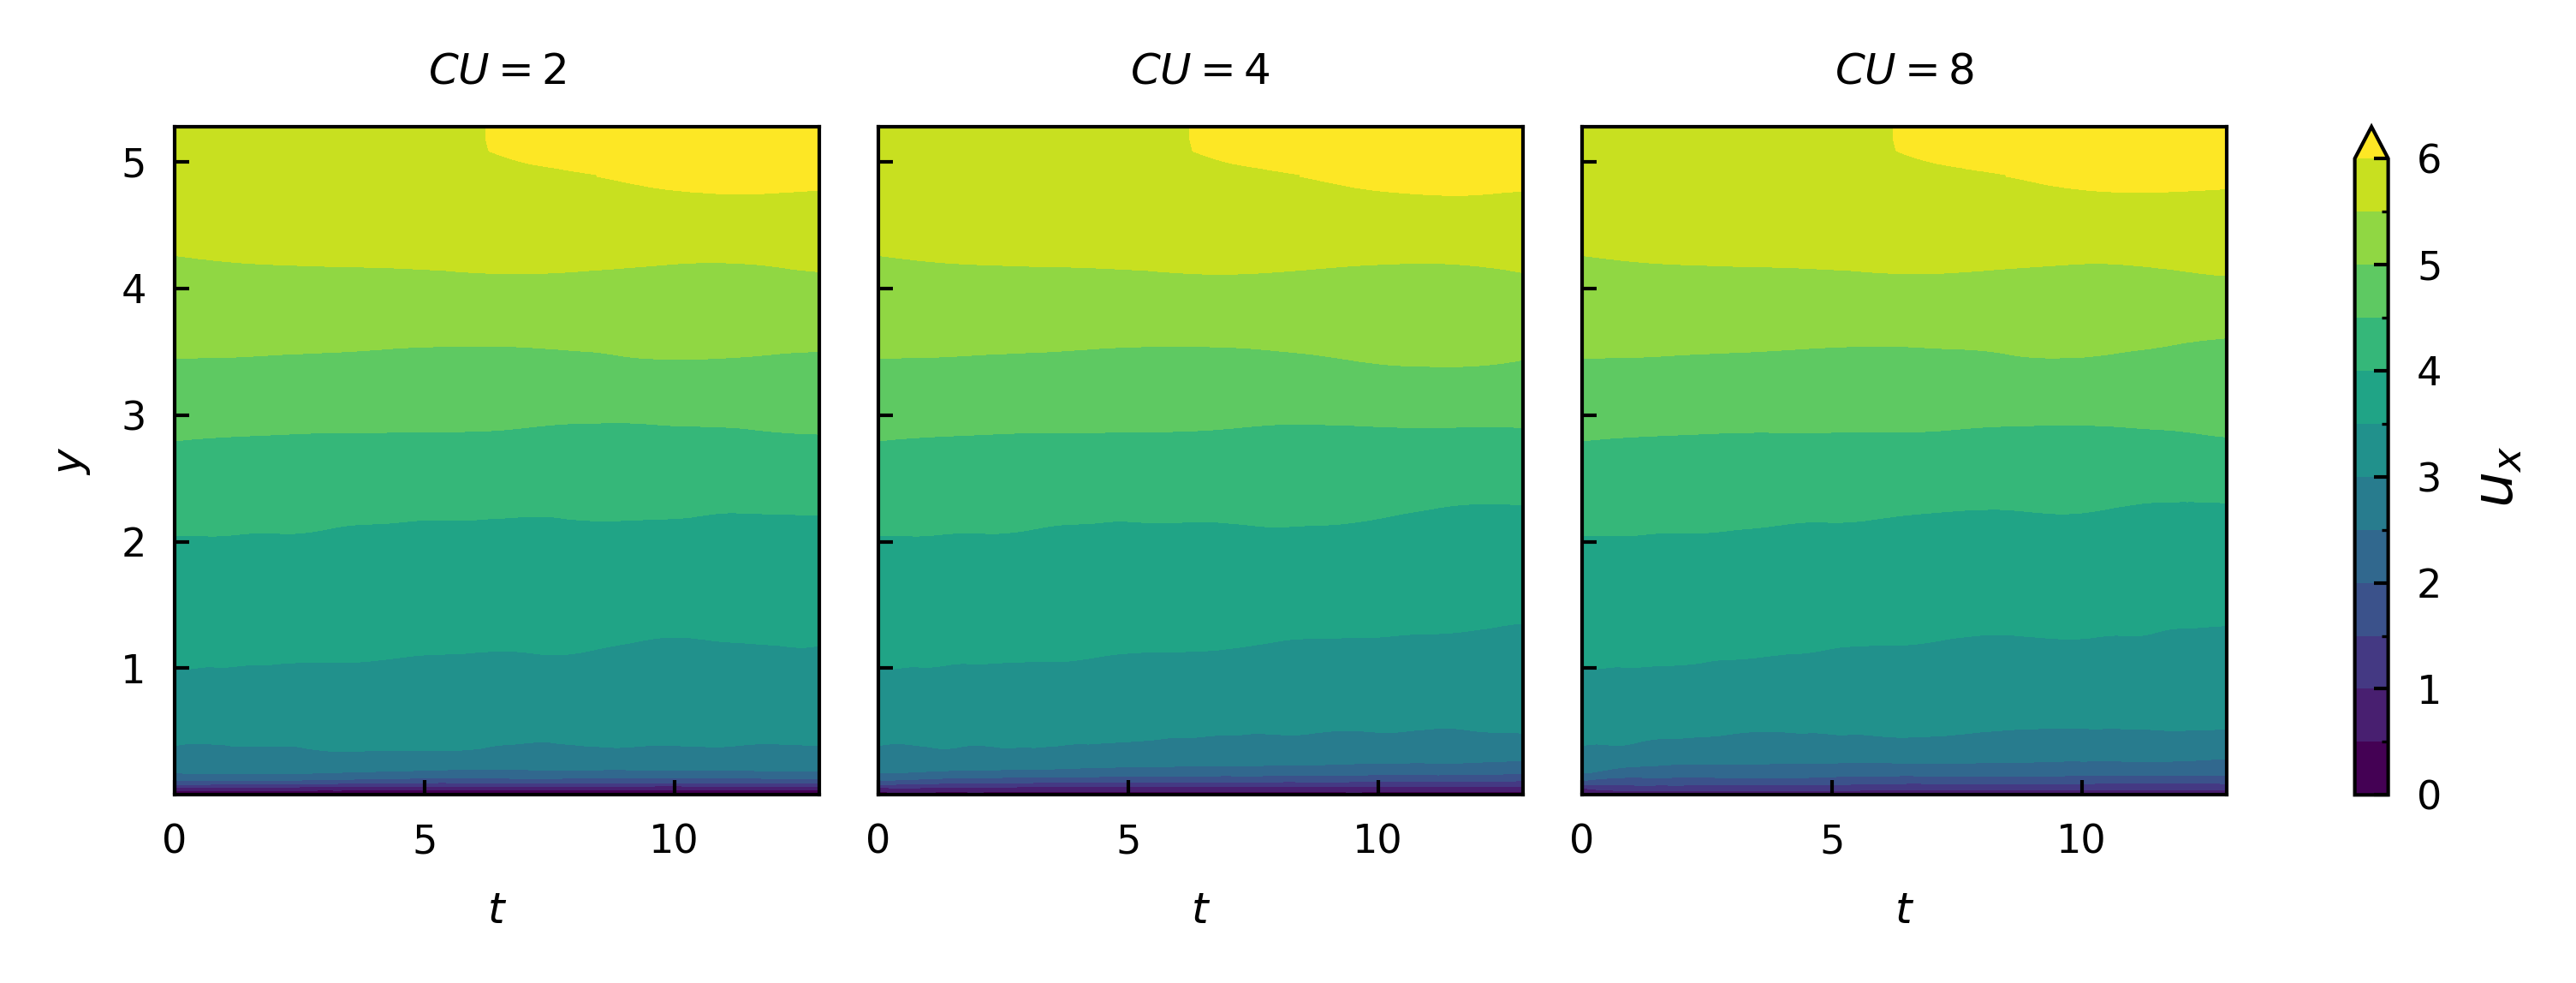

In [91]:
g = ds.ux.where(ds.y>0, drop=True).mean(dim='x').plot.contourf(col='CU', \
        x='t', col_wrap=3, vmin=0, vmax=6, levels=13, cbar_kwargs={'label':r'$u_x$'}, figsize=[5.5,2])
g.set_titles(template="$CU = {value}$", fontsize=6)
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel('$t$', fontsize=6)
    if i == 0:
        ax.set_ylabel('$y$', fontsize=6)